# Tugas 3

In [1]:
%pip install pymysql
%pip install psycopg2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.0/45.0 kB 1.6 MB/s eta 0:00:00


berfungsi untuk menginstal dua pustaka Python, yaitu pymysql dan psycopg2, menggunakan pip, yang merupakan manajer paket untuk Python.

- pymysql adalah pustaka yang digunakan untuk terhubung dan berinteraksi dengan database MySQL menggunakan Python.

- psycopg2 adalah pustaka yang digunakan untuk menghubungkan dan menjalankan query pada database PostgreSQL dari Python.

In [24]:
import psycopg2
import pymysql
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor
from matplotlib.legend_handler import HandlerPathCollection
from scipy.spatial.distance import euclidean

def get_pg_data():
    conn = psycopg2.connect(
        host="pg-24ccfcfa-iqbal.i.aivencloud.com",
        user="avnadmin",
        password="AVNS_7h7RaEuETy6xtaTdGPL",
        database="defaultdb",
        port=11038
    )
    cursor = conn.cursor()
    cursor.execute("SELECT * FROM iris_data")
    data = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]  # Ambil nama kolom
    cursor.close()
    conn.close()

    return pd.DataFrame(data, columns=columns)

def get_mysql_data():
    conn = pymysql.connect(
        host="mysql-207e66db-iqbal.h.aivencloud.com",
        user="avnadmin",
        password="AVNS_moPYLh4RrOq11aEBY_x",
        database="iris",
        port=11038
    )
    cursor = conn.cursor()
    cursor.execute("SELECT * FROM iris_dataset")
    data = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]  # Ambil nama kolom
    cursor.close()
    conn.close()

    return pd.DataFrame(data, columns=columns)

# Ambil data dari kedua database
df_postgresql = get_pg_data()
df_mysql = get_mysql_data()

# Gabungkan berdasarkan kolom 'id' dan 'Class'
df_merged = pd.merge(df_mysql, df_postgresql, on=["id", "class"], how="inner")

feature_columns = ["petal_length", "petal_width", "sepal_length", "sepal_width"]
data_values = df_merged[feature_columns].values

# Cetak semua data hasil gabungan tanpa indeks
print(df_merged.to_string(index=False))

# Menerapkan Local Outlier Factor untuk deteksi outlier
X = df_merged.iloc[:, 2:].values  # Mengambil fitur numerik
clf = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
y_pred = clf.fit_predict(X)
df_merged['outlier'] = np.where(y_pred == -1, -1, 1)  # Menandai outlier (-1) dan non-outlier (1)
X_scores = clf.negative_outlier_factor_

# Menampilkan tabel ID dan status outlier
outlier_table = df_merged[['id','class', 'outlier']]
print("\nTabel ID dan Status Outlier:")
print(outlier_table.to_string(index=False))

# Menampilkan jumlah outlier
total_outliers = (y_pred == -1).sum()
print(f"Jumlah outlier yang terdeteksi: {total_outliers}")

 id           class  petal_length  petal_width  sepal_length  sepal_width
  1     Iris-setosa          64.0         72.0          85.1         93.5
  2     Iris-setosa          14.0          2.0         904.9        309.1
  3     Iris-setosa          10.3         50.2         584.7        803.2
  4     Iris-setosa          31.5          4.2         304.6        163.1
  5     Iris-setosa          49.4          3.2         605.0        703.6
  6     Iris-setosa           1.7          0.4           5.4          3.9
  7     Iris-setosa           1.4          0.3           4.0          3.4
  8     Iris-setosa           1.5          0.2           5.0          3.4
  9     Iris-setosa           1.4          0.2           4.4          2.9
 10     Iris-setosa           1.5          0.4           4.9          3.1
 11     Iris-setosa           1.5          0.3           5.4          3.7
 12     Iris-setosa           1.6          0.2           4.8          3.4
 13     Iris-setosa           1.3     

Kode di atas bertujuan untuk mengambil data dari dua database, yaitu PostgreSQL dan MySQL, kemudian menggabungkannya dan mendeteksi outlier menggunakan metode Local Outlier Factor (LOF). Data pertama diambil melalui fungsi get_pg_data(), yang mengakses tabel iris_data dari PostgreSQL, dan fungsi get_mysql_data(), yang mengambil data dari tabel iris_dataset di MySQL. Setelah kedua dataset berhasil diambil, data digabungkan berdasarkan kolom "id" dan "class" menggunakan metode inner join, sehingga hanya data yang memiliki pasangan di kedua database yang dipertahankan. Selanjutnya, semua data hasil penggabungan ditampilkan dalam bentuk tabel tanpa indeks agar dapat dianalisis lebih lanjut.

Proses deteksi outlier dilakukan dengan menerapkan metode LOF pada empat fitur numerik, yaitu petal_length, petal_width, sepal_length, dan sepal_width. Model LOF dikonfigurasi dengan parameter n_neighbors=20, yang berarti setiap titik data akan dibandingkan dengan 20 tetangga terdekatnya, serta contamination=0.1, yang mengasumsikan bahwa 10% data merupakan outlier. Hasil deteksi ini ditambahkan ke dalam dataset dengan label -1 untuk outlier dan 1 untuk data yang dianggap normal. Setelah proses ini selesai, kode akan mencetak tabel yang berisi ID, kelas (class), dan status outlier (outlier). Terakhir, jumlah total outlier yang terdeteksi juga ditampilkan

Jumlah data sebelum pembersihan: 150
Jumlah data setelah pembersihan: 135
 id           class  petal_length  petal_width  sepal_length  sepal_width
  6     Iris-setosa           1.7          0.4           5.4          3.9
  7     Iris-setosa           1.4          0.3           4.0          3.4
  8     Iris-setosa           1.5          0.2           5.0          3.4
  9     Iris-setosa           1.4          0.2           4.4          2.9
 10     Iris-setosa           1.5          0.4           4.9          3.1
 11     Iris-setosa           1.5          0.3           5.4          3.7
 12     Iris-setosa           1.6          0.2           4.8          3.4
 13     Iris-setosa           1.3          0.4           4.8          3.0
 14     Iris-setosa           1.0          0.2           4.3          3.0
 15     Iris-setosa           1.2          0.2           5.8          4.0
 16     Iris-setosa           1.5          0.4           5.7          4.0
 17     Iris-setosa           1.3     

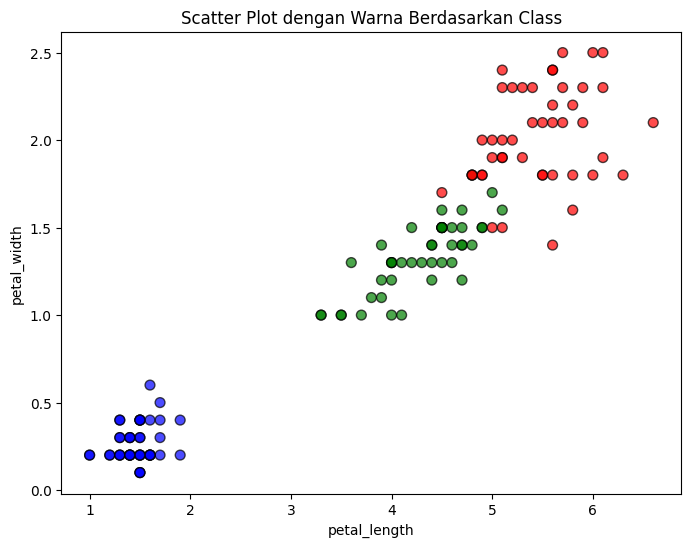

In [34]:
import psycopg2
import pymysql
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from sklearn.inspection import DecisionBoundaryDisplay
from matplotlib.legend_handler import HandlerPathCollection
from sklearn.model_selection import train_test_split

def get_pg_data():
    conn = psycopg2.connect(
        host="pg-24ccfcfa-iqbal.i.aivencloud.com",
        user="avnadmin",
        password="AVNS_7h7RaEuETy6xtaTdGPL",
        database="defaultdb",
        port=11038
    )
    cursor = conn.cursor()
    cursor.execute("SELECT * FROM iris_data")
    data = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]
    cursor.close()
    conn.close()
    return pd.DataFrame(data, columns=columns)

def get_mysql_data():
    conn = pymysql.connect(
        host="mysql-207e66db-iqbal.h.aivencloud.com",
        user="avnadmin",
        password="AVNS_moPYLh4RrOq11aEBY_x",
        database="iris",
        port=11038
    )
    cursor = conn.cursor()
    cursor.execute("SELECT * FROM iris_dataset")
    data = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]
    cursor.close()
    conn.close()
    return pd.DataFrame(data, columns=columns)

# Ambil data dari kedua database
df_postgresql = get_pg_data()
df_mysql = get_mysql_data()

# Gabungkan berdasarkan kolom 'id' dan 'class'
df_merged = pd.merge(df_mysql, df_postgresql, on=["id", "class"], how="inner")

# Ambil data fitur numerik
feature_columns = ["petal_length", "petal_width", "sepal_length", "sepal_width"]
data_values = df_merged[feature_columns].values

# Menerapkan LOF untuk deteksi outlier
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
outlier_labels = lof.fit_predict(data_values)
df_merged["outlier"] = outlier_labels

# Menghapus data yang terdeteksi sebagai outlier
df_cleaned = df_merged[df_merged["outlier"] == 1].drop(columns=["outlier"])

# Menampilkan jumlah data sebelum dan setelah pembersihan
print(f"Jumlah data sebelum pembersihan: {df_merged.shape[0]}")
print(f"Jumlah data setelah pembersihan: {df_cleaned.shape[0]}")

# Menampilkan data yang telah dibersihkan
print(df_cleaned.to_string(index=False))

import matplotlib.pyplot as plt

# Pilih dua fitur untuk scatter plot
x_feature = "petal_length"
y_feature = "petal_width"

# Warna berdasarkan kelas
colors = {"Iris-setosa": "blue", "Iris-versicolor": "green", "Iris-virginica": "red"}
df_cleaned["color"] = df_cleaned["class"].map(colors)

# Plot scatter dengan ukuran (s) dan warna (c)
plt.figure(figsize=(8, 6))
plt.scatter(df_cleaned[x_feature], df_cleaned[y_feature], s=50, c=df_cleaned["color"], alpha=0.7, edgecolors="k")
plt.xlabel(x_feature)
plt.ylabel(y_feature)
plt.title("Scatter Plot dengan Warna Berdasarkan Class")
plt.show()


Kode di atas bertujuan untuk mengambil, menggabungkan, membersihkan, dan memvisualisasikan data bunga iris dari dua sumber basis data yang berbeda, yaitu PostgreSQL dan MySQL. Data pertama diambil menggunakan fungsi get_pg_data(), yang mengakses tabel iris_data dari PostgreSQL, serta get_mysql_data(), yang mengambil data dari tabel iris_dataset di MySQL. Setelah kedua dataset berhasil diambil, data digabungkan berdasarkan kolom "id" dan "class" menggunakan metode inner join, sehingga hanya data yang memiliki pasangan di kedua database yang dipertahankan.

Setelah penggabungan, dilakukan deteksi outlier menggunakan metode Local Outlier Factor (LOF) dengan parameter n_neighbors=20 dan contamination=0.1, yang berarti 10% data dianggap sebagai outlier. Data yang terdeteksi sebagai outlier ditandai dalam kolom tambahan bernama "outlier". Selanjutnya, data yang terdeteksi sebagai outlier dihapus, dan jumlah data sebelum serta sesudah pembersihan ditampilkan untuk melihat dampak dari proses tersebut.

Sebagai langkah akhir, kode menghasilkan visualisasi scatter plot menggunakan Matplotlib untuk melihat distribusi data setelah pembersihan. Dua fitur utama yang digunakan dalam scatter plot adalah "petal_length" dan "petal_width", dengan warna titik yang berbeda berdasarkan kelas bunga (Iris-setosa, Iris-versicolor, dan Iris-virginica). Warna biru digunakan untuk Iris-setosa, hijau untuk Iris-versicolor, dan merah untuk Iris-virginica. Titik-titik data diberikan tepi hitam (edgecolors="k") agar lebih mudah dibedakan dalam grafik.

In [36]:
# Bagi data menjadi Training (80%) dan Testing (20%)
X_train, X_test, y_train, y_test = train_test_split(
    df_cleaned[feature_columns], df_cleaned["class"], test_size=0.2, random_state=42
)

print(f"Jumlah data setelah pembersihan: {df_cleaned.shape[0]}")
print(f"Training set: {X_train.shape[0]} sampel")
print(f"Testing set: {X_test.shape[0]} sampel")


Jumlah data setelah pembersihan: 135
Training set: 108 sampel
Testing set: 27 sampel


Kode di atas bertujuan untuk membagi dataset yang telah dibersihkan menjadi dua bagian: Training set (80%) dan Testing set (20%). Proses ini menggunakan fungsi train_test_split() dari Scikit-Learn dengan parameter random_state=42 agar pembagian data tetap konsisten setiap kali dijalankan.

Dataset yang digunakan adalah df_cleaned, yaitu data hasil pembersihan outlier. Variabel X_train dan X_test berisi fitur (feature_columns), sedangkan y_train dan y_test berisi label kelas ("class") untuk setiap sampel. Setelah pembagian, jumlah total data setelah pembersihan ditampilkan, diikuti dengan jumlah sampel yang masuk ke dalam Training set dan Testing set. Hal ini penting untuk memastikan bahwa data yang digunakan dalam pelatihan dan pengujian model sudah terdistribusi dengan baik.

Akurasi: 0.9333333333333333
                 precision    recall  f1-score   support

    Iris-setosa       0.83      1.00      0.91        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      0.82      0.90        11

       accuracy                           0.93        30
      macro avg       0.94      0.94      0.94        30
   weighted avg       0.94      0.93      0.93        30



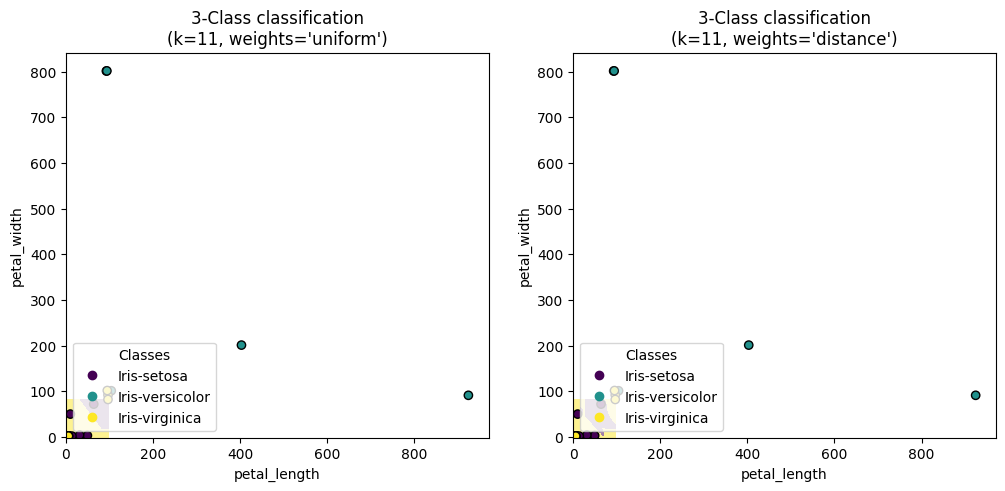

In [38]:
# data dari 150

import psycopg2
import pymysql
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from sklearn.inspection import DecisionBoundaryDisplay

# Fungsi untuk mengambil data dari PostgreSQL
def get_pg_data():
    conn = psycopg2.connect(
        host="pg-24ccfcfa-iqbal.i.aivencloud.com",
        user="avnadmin",
        password="AVNS_7h7RaEuETy6xtaTdGPL",
        database="defaultdb",
        port=11038
    )
    cursor = conn.cursor()
    cursor.execute("SELECT * FROM iris_data")
    data = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]
    cursor.close()
    conn.close()
    return pd.DataFrame(data, columns=columns)

# Fungsi untuk mengambil data dari MySQL
def get_mysql_data():
    conn = pymysql.connect(
        host="mysql-207e66db-iqbal.h.aivencloud.com",
        user="avnadmin",
        password="AVNS_moPYLh4RrOq11aEBY_x",
        database="iris",
        port=11038
    )
    cursor = conn.cursor()
    cursor.execute("SELECT * FROM iris_dataset")
    data = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]
    cursor.close()
    conn.close()
    return pd.DataFrame(data, columns=columns)

# Ambil data dari kedua database
df_postgresql = get_pg_data()
df_mysql = get_mysql_data()

# Gabungkan berdasarkan kolom 'id' dan 'class'
df_merged = pd.merge(df_mysql, df_postgresql, on=["id", "class"], how="inner")

# Ambil dua fitur utama untuk visualisasi decision boundary
feature_columns = ["petal_length", "petal_width"]
X = df_merged[feature_columns]
y = df_merged["class"]

# Encode label kelas ke numerik
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Membagi data menjadi training (80%) dan testing (20%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42
)

# Pipeline dengan KNN dan StandardScaler
clf = Pipeline([
    ("scaler", StandardScaler()),
    ("knn", KNeighborsClassifier(n_neighbors=11))
])

# Pelatihan model KNN
clf.fit(X_train, y_train)

# Evaluasi model
y_pred = clf.predict(X_test)
print(f"Akurasi: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

# Visualisasi Decision Boundary
_, axs = plt.subplots(ncols=2, figsize=(12, 5))

for ax, weights in zip(axs, ("uniform", "distance")):
    clf.set_params(knn__weights=weights).fit(X_train, y_train)
    disp = DecisionBoundaryDisplay.from_estimator(
        clf,
        X_test,
        response_method="predict",
        plot_method="pcolormesh",
        xlabel=feature_columns[0],
        ylabel=feature_columns[1],
        shading="auto",
        alpha=0.5,
        ax=ax,
    )
    scatter = disp.ax_.scatter(
        X_train.iloc[:, 0], X_train.iloc[:, 1],
        c=y_train, edgecolors="k", cmap="viridis"
    )
    disp.ax_.legend(
        scatter.legend_elements()[0],
        label_encoder.classes_,
        loc="lower left",
        title="Classes",
    )
    _ = disp.ax_.set_title(
        f"3-Class classification\n(k={clf[-1].n_neighbors}, weights={weights!r})"
    )

plt.show()

Kode di atas mengimplementasikan K-Nearest Neighbors (KNN) untuk klasifikasi dataset Iris yang diambil dari dua database (PostgreSQL dan MySQL).

1. Mengambil Data

  - Data diambil dari tabel iris_data di PostgreSQL dan iris_dataset di MySQL.

  - Data dari kedua database digabungkan berdasarkan kolom 'id' dan 'class'.

2. Pra-pemrosesan Data

  - Hanya dua fitur utama yang dipilih untuk analisis dan visualisasi: petal_length dan petal_width.

  - Label kelas dikonversi menjadi nilai numerik menggunakan LabelEncoder.

  - Data dibagi menjadi 80% training dan 20% testing menggunakan train_test_split().

3. Pelatihan Model KNN

  - Model KNN dengan k=11 diterapkan dalam Pipeline yang mencakup StandardScaler (normalisasi data).

  - Model dilatih menggunakan X_train dan y_train.

4. Evaluasi Model

  - Akurasi model dihitung menggunakan accuracy_score().

  - Laporan klasifikasi (classification_report) menampilkan metrik seperti precision, recall, dan
  F1-score untuk setiap kelas.

5. Visualisasi Decision Boundary

  - Decision boundary divisualisasikan untuk membandingkan dua jenis bobot KNN:

    - uniform → Semua tetangga memiliki bobot yang sama.
    - distance → Tetangga yang lebih dekat memiliki bobot lebih besar.

  - Hasilnya divisualisasikan dengan pcolormesh, serta menampilkan titik data training dengan warna sesuai kelasnya.

Akurasi: 0.9629629629629629
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       0.88      1.00      0.93         7
 Iris-virginica       1.00      0.88      0.93         8

       accuracy                           0.96        27
      macro avg       0.96      0.96      0.96        27
   weighted avg       0.97      0.96      0.96        27



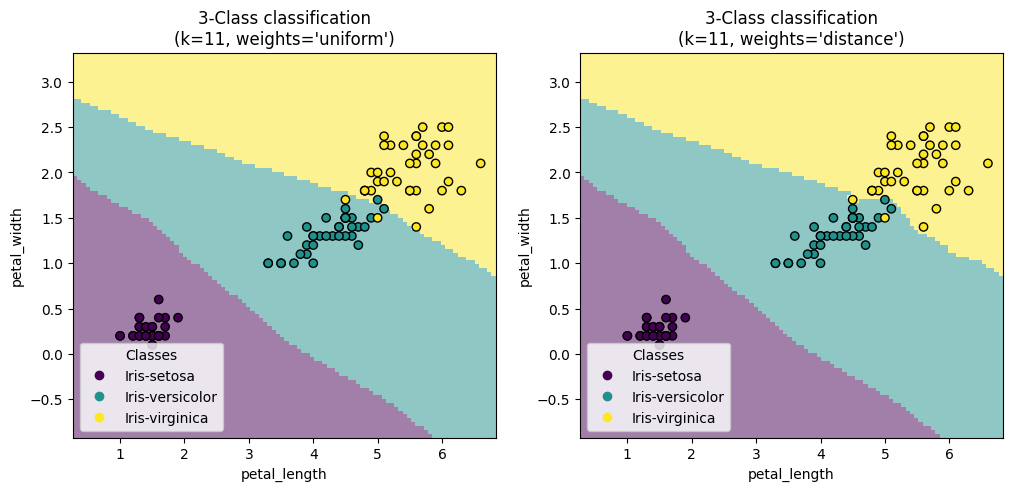

In [37]:
import psycopg2
import pymysql
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor, KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from sklearn.inspection import DecisionBoundaryDisplay

# Fungsi untuk mengambil data dari PostgreSQL
def get_pg_data():
    conn = psycopg2.connect(
        host="pg-24ccfcfa-iqbal.i.aivencloud.com",
        user="avnadmin",
        password="AVNS_7h7RaEuETy6xtaTdGPL",
        database="defaultdb",
        port=11038
    )
    cursor = conn.cursor()
    cursor.execute("SELECT * FROM iris_data")
    data = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]
    cursor.close()
    conn.close()
    return pd.DataFrame(data, columns=columns)

# Fungsi untuk mengambil data dari MySQL
def get_mysql_data():
    conn = pymysql.connect(
        host="mysql-207e66db-iqbal.h.aivencloud.com",
        user="avnadmin",
        password="AVNS_moPYLh4RrOq11aEBY_x",
        database="iris",
        port=11038
    )
    cursor = conn.cursor()
    cursor.execute("SELECT * FROM iris_dataset")
    data = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]
    cursor.close()
    conn.close()
    return pd.DataFrame(data, columns=columns)

# Ambil data dari kedua database
df_postgresql = get_pg_data()
df_mysql = get_mysql_data()

# Gabungkan berdasarkan kolom 'id' dan 'class'
df_merged = pd.merge(df_mysql, df_postgresql, on=["id", "class"], how="inner")

# Ambil dua fitur utama untuk visualisasi decision boundary
feature_columns = ["petal_length", "petal_width"]
X = df_merged[feature_columns]
y = df_merged["class"]

# Encode label kelas ke numerik
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)  # Mengubah nama kelas menjadi angka

# Menerapkan LOF untuk deteksi outlier
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
outlier_labels = lof.fit_predict(X)
df_merged["outlier"] = outlier_labels

# Menghapus data yang terdeteksi sebagai outlier
df_cleaned = df_merged[df_merged["outlier"] == 1].drop(columns=["outlier"])

# Membagi data menjadi training (80%) dan testing (20%)
X_train, X_test, y_train, y_test = train_test_split(
    df_cleaned[feature_columns],
    label_encoder.transform(df_cleaned["class"]),  # Pastikan target dalam bentuk numerik
    test_size=0.2,
    random_state=42
)

# Pipeline dengan KNN dan StandardScaler
clf = Pipeline([
    ("scaler", StandardScaler()),
    ("knn", KNeighborsClassifier(n_neighbors=11))
])

# Pelatihan model KNN
clf.fit(X_train, y_train)

# Evaluasi model
y_pred = clf.predict(X_test)
print(f"Akurasi: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

# Visualisasi Decision Boundary
_, axs = plt.subplots(ncols=2, figsize=(12, 5))

for ax, weights in zip(axs, ("uniform", "distance")):
    clf.set_params(knn__weights=weights).fit(X_train, y_train)
    disp = DecisionBoundaryDisplay.from_estimator(
        clf,
        X_test,
        response_method="predict",
        plot_method="pcolormesh",
        xlabel=feature_columns[0],
        ylabel=feature_columns[1],
        shading="auto",
        alpha=0.5,
        ax=ax,
    )
    scatter = disp.ax_.scatter(
        X_train.iloc[:, 0], X_train.iloc[:, 1],
        c=y_train, edgecolors="k", cmap="viridis"
    )
    disp.ax_.legend(
        scatter.legend_elements()[0],
        label_encoder.classes_,
        loc="lower left",
        title="Classes",
    )
    _ = disp.ax_.set_title(
        f"3-Class classification\n(k={clf[-1].n_neighbors}, weights={weights!r})"
    )

plt.show()


Kode di atas merupakan analisis data Iris yang diambil dari PostgreSQL dan MySQL, dengan langkah-langkah berikut:

1. Mengambil Data dari Database
  - get_pg_data() mengambil data dari PostgreSQL.

  - get_mysql_data() mengambil data dari MySQL.

  - Kedua data digabungkan berdasarkan kolom id dan class.
2. Pra-pemrosesan Data
  - Memilih fitur utama: petal_length dan petal_width.

  - LabelEncoder mengonversi nama kelas (Iris-setosa, Iris-versicolor, Iris-virginica) menjadi angka.

  - Local Outlier Factor (LOF) digunakan untuk mendeteksi dan menghapus outlier dari dataset.

  - Dataset dibagi menjadi 80% training dan 20% testing menggunakan train_test_split().
3. Melatih Model KNN

  - Model menggunakan K-Nearest Neighbors (KNN) dengan k=11 dalam pipeline yang mencakup StandardScaler untuk normalisasi data.

  - Model dilatih dengan X_train dan y_train.

  - Evaluasi model dilakukan dengan akurasi dan classification report.
4. Visualisasi Decision Boundary

  - Decision boundary divisualisasikan menggunakan DecisionBoundaryDisplay.

  - Dibandingkan dua metode penentuan bobot:
    - uniform → Semua tetangga berbobot sama.
    - distance → Tetangga yang lebih dekat memiliki bobot lebih besar.

  - Hasilnya divisualisasikan menggunakan pcolormesh dengan titik data dari training set ditampilkan sesuai kelasnya.